In [ ]:
#1 DATA IMPORT AND CLEANING
import pandas as pd
import matplotlib as plt
import numpy as np

missing_data = df.isnull().sum()
df_clean = df.dropna()

df = pd.read_csv('global_power_plant_database.csv')
pd.read_csv('global_power_plant_database.csv')


C:\Users\AQS_PSTB\AppData\Local\Temp\ipykernel_7444\1141948.py:8: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')
C:\Users\AQS_PSTB\AppData\Local\Temp\ipykernel_7444\1141948.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  pd.read_csv('global_power_plant_database.csv')


,country,country_long,name,gppd_idnr,capacity_mw,latitude,longitude,primary_fuel,other_fuel1,other_fuel2,...,estimated_generation_gwh_2013,estimated_generation_gwh_2014,estimated_generation_gwh_2015,estimated_generation_gwh_2016,estimated_generation_gwh_2017,estimated_generation_note_2013,estimated_generation_note_2014,estimated_generation_note_2015,estimated_generation_note_2016,estimated_generation_note_2017
0,AFG,Afghanistan,Kajaki Hydroelectric Power Plant Afghanistan,GEODB0040538,33.0,32.3220,65.1190,Hydro,NaN,NaN,...,123.77,162.90,97.39,137.76,119.50,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
1,AFG,Afghanistan,Kandahar DOG,WKS0070144,10.0,31.6700,65.7950,Solar,NaN,NaN,...,18.43,17.48,18.25,17.70,18.29,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
2,AFG,Afghanistan,Kandahar JOL,WKS0071196,10.0,31.6230,65.7920,Solar,NaN,NaN,...,18.64,17.58,19.10,17.62,18.72,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE,SOLAR-V1-NO-AGE
3,AFG,Afghanistan,Mahipar Hydroelectric Power Plant Afghanistan,GEODB0040541,66.0,34.5560,69.4787,Hydro,NaN,NaN,...,225.06,203.55,146.90,230.18,174.91,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
4,AFG,Afghanistan,Naghlu Dam Hydroelectric Power Plant Afghanistan,GEODB0040534,100.0,34.6410,69.7170,Hydro,NaN,NaN,...,406.16,357.22,270.99,395.38,350.80,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34931,ZMB,Zambia,Ndola,WRI1022386,50.0,-12.9667,28.6333,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,183.79,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34932,ZMB,Zambia,Nkana,WRI1022384,20.0,-12.8167,28.2000,Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,73.51,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1
34933,ZMB,Zambia,Victoria Falls,WRI1022380,108.0,-17.9167,25.8500,Hydro,NaN,NaN,...,575.78,575.78,548.94,579.90,578.32,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1,HYDRO-V1
34934,ZWE,Zimbabwe,Hwange Coal Power Plant Zimbabwe,GEODB0040404,920.0,-18.3835,26.4700,Coal,NaN,NaN,...,NaN,NaN,NaN,NaN,2785.10,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,NO-ESTIMATION,CAPACITY-FACTOR-V1


In [12]:
#convert relevant columns to numerical types
non_numeric_cols = df.select_dtypes(exclude=[np.number]).columns
print(non_numeric_cols)

Index(['country', 'country_long', 'name', 'gppd_idnr', 'primary_fuel',
       'other_fuel1', 'other_fuel2', 'other_fuel3', 'owner', 'source', 'url',
       'geolocation_source', 'wepp_id', 'generation_data_source',
       'estimated_generation_note_2013', 'estimated_generation_note_2014',
       'estimated_generation_note_2015', 'estimated_generation_note_2016',
       'estimated_generation_note_2017'],
      dtype='object')


In [ ]:
#2 EXPLORATORY DATA ANALYSIS
df['colonne'] = pd.to_numeric(df['colonne'], errors='coerce')  
# convertir en numérique avec gestion des erreurs
arr_num = df['colonne'].to_numpy()

In [14]:
df_non_numeric = df[non_numeric_cols]
print(df_non_numeric.head())


  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr primary_fuel other_fuel1 other_fuel2 other_fuel3 owner  \
0  GEODB0040538        Hydro         NaN         NaN         NaN   NaN   
1    WKS0070144        Solar         NaN         NaN         NaN   NaN   
2    WKS0071196        Solar         NaN         NaN         NaN   NaN   
3  GEODB0040541        Hydro         NaN         NaN         NaN   NaN   
4  GEODB0040534        Hydro         NaN         NaN         NaN   NaN   

       source                                 url geolocation_source  wepp_id  \
0       GEODB  ht

In [15]:
for col in non_numeric_cols:
    # Tenter conversion numérique (ex: '123', '4.5' deviennent 123, 4.5)
    df[col] = pd.to_numeric(df[col], errors='coerce')
    
    # Calculer le taux de NaN après conversion
    na_ratio = df[col].isna().mean()
    
    if na_ratio > 0.5:
        # Si trop de NaN, c'est sans doute du texte catégoriel, on encode avec des codes numériques
        df[col] = df[col].astype('category').cat.codes
        print(f"Colonne '{col}' encodée avec codes catégoriels.")
    else:
        print(f"Colonne '{col}' convertie en numérique.")

# Afficher un aperçu du DataFrame converti
print(df.head())

Colonne 'country' encodée avec codes catégoriels.
Colonne 'country_long' encodée avec codes catégoriels.
Colonne 'name' encodée avec codes catégoriels.
Colonne 'gppd_idnr' encodée avec codes catégoriels.
Colonne 'primary_fuel' encodée avec codes catégoriels.
Colonne 'other_fuel1' encodée avec codes catégoriels.
Colonne 'other_fuel2' encodée avec codes catégoriels.
Colonne 'other_fuel3' encodée avec codes catégoriels.
Colonne 'owner' encodée avec codes catégoriels.
Colonne 'source' encodée avec codes catégoriels.
Colonne 'url' encodée avec codes catégoriels.
Colonne 'geolocation_source' encodée avec codes catégoriels.
Colonne 'wepp_id' encodée avec codes catégoriels.
Colonne 'generation_data_source' encodée avec codes catégoriels.
Colonne 'estimated_generation_note_2013' encodée avec codes catégoriels.
Colonne 'estimated_generation_note_2014' encodée avec codes catégoriels.
Colonne 'estimated_generation_note_2015' encodée avec codes catégoriels.
Colonne 'estimated_generation_note_2016' 

Statistiques descriptives des colonnes numériques :
       country  country_long     name  gppd_idnr   capacity_mw      latitude  \
count  34936.0       34936.0  34936.0    34936.0  34936.000000  34936.000000   
mean      -1.0          -1.0     -1.0       -1.0    163.355148     32.816637   
std        0.0           0.0      0.0        0.0    489.636072     22.638603   
min       -1.0          -1.0     -1.0       -1.0      1.000000    -77.847000   
25%       -1.0          -1.0     -1.0       -1.0      4.900000     29.256475   
50%       -1.0          -1.0     -1.0       -1.0     16.745000     39.727750   
75%       -1.0          -1.0     -1.0       -1.0     75.344250     46.263125   
max       -1.0          -1.0     -1.0       -1.0  22500.000000     71.292000   

          longitude  primary_fuel  other_fuel1  other_fuel2  ...  \
count  34936.000000       34936.0      34936.0      34936.0  ...   
mean      -6.972803          -1.0         -1.0         -1.0  ...   
std       78.405850    

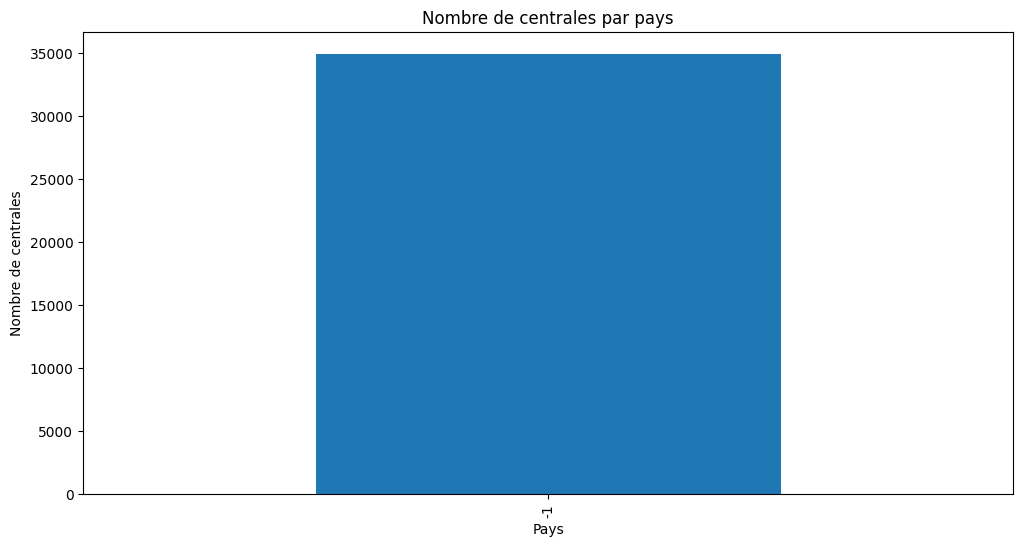

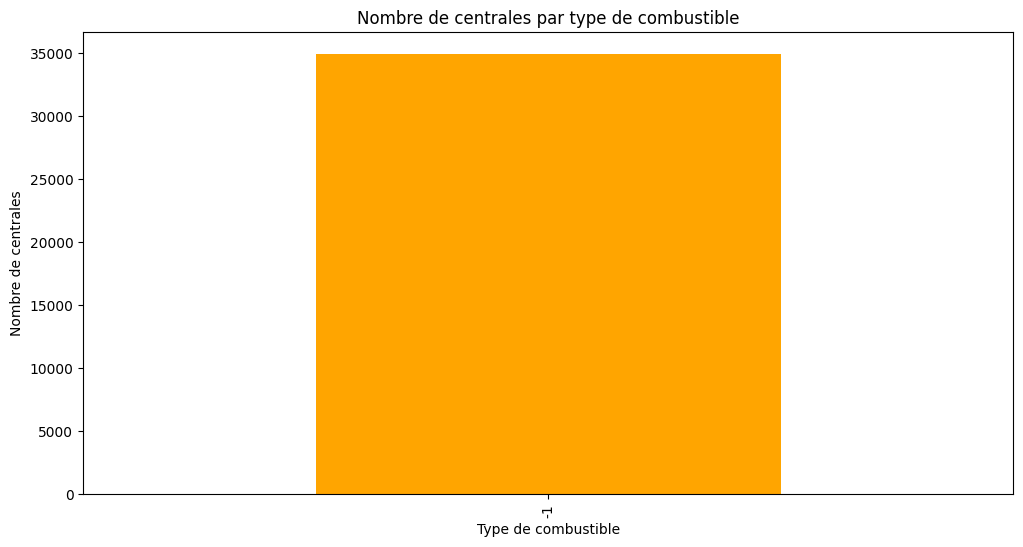

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

numerical_cols = df.select_dtypes(include=[np.number]).columns
print("Statistiques descriptives des colonnes numériques :")
print(df[numerical_cols].describe())

# Moyenne, médiane, écart-type de toutes les colonnes numériques
for col in numerical_cols:
    mean_val = df[col].mean()
    median_val = df[col].median()
    std_val = df[col].std()
    print(f"{col} - Moyenne: {mean_val:.2f}, Médiane: {median_val:.2f}, Écart-type: {std_val:.2f}")

# 3. Distribution des centrales par pays
plt.figure(figsize=(12,6))
country_counts = df['country_long'].value_counts()
country_counts.plot(kind='bar')
plt.title('Nombre de centrales par pays')
plt.xlabel('Pays')
plt.ylabel('Nombre de centrales')
plt.show()

# 4. Distribution des centrales par type de combustible principal (fuel1)
plt.figure(figsize=(12,6))
fuel_counts = df['other_fuel1'].value_counts()
fuel_counts.plot(kind='bar', color='orange')
plt.title('Nombre de centrales par type de combustible')
plt.xlabel('Type de combustible')
plt.ylabel('Nombre de centrales')
plt.show()

#3 STATISTICAL ANALYSIS